## Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

## Pre-processing
We will explore the BITCOIN and DOGECOIN datasets as it the market is very volatile and it is interesting to see how the prices have changed over time.
### Set file path

In [27]:
Doge_path = 'dataset/coin_Dogecoin.csv'
Bit_path= 'dataset/coin_Bitcoin.csv'

### Load data

In [28]:
Doge_df = pd.DataFrame(pd.read_csv(Doge_path))
Bit_df = pd.DataFrame(pd.read_csv(Bit_path))

### Merge data

In [29]:
df = pd.concat([Doge_df, Bit_df], axis=0)

### Overview of the raw dataframe
View some rows of the dataframe.


In [30]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


View the statistics of the dataframe.

In [31]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5.751000e+03,5.751000e+03
mean,1440.569640,3585.112064,3373.272259,3484.641824,3490.437785,5.879831e+09,6.371055e+10
std,834.162659,9074.757062,8481.305602,8801.428873,8810.281624,1.472069e+10,1.634387e+11
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,719.500000,0.002029,0.001919,0.001982,0.001982,2.179245e+06,2.335385e+08
50%,1438.000000,127.470001,122.000000,125.849998,125.910004,4.212183e+07,3.321977e+09
75%,2157.000000,2908.924927,2703.465088,2818.119995,2820.705078,2.828975e+09,5.658991e+10
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5751 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        5751 non-null   int64  
 1   Name       5751 non-null   object 
 2   Symbol     5751 non-null   object 
 3   Date       5751 non-null   object 
 4   High       5751 non-null   float64
 5   Low        5751 non-null   float64
 6   Open       5751 non-null   float64
 7   Close      5751 non-null   float64
 8   Volume     5751 non-null   float64
 9   Marketcap  5751 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 494.2+ KB


## Data cleaning and wrangling
### Check for missing values


In [33]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

There are no missing values in this dataset.

### Convert data types
Currently, the 'Date' column is an object. We will convert it to a datetime object.

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

### Check the consistency of the dataframe
#### Check for duplicated data

In [35]:
df.duplicated().sum()


0

There is no duplicated data in the dataframe.

#### Check for range of values

In [36]:
print("Doge Date Range")
print(df[df['Symbol'] == 'DOGE']['Date'].min())
print(df[df['Symbol'] == 'DOGE']['Date'].max())
print("Bit Date Range")
print(df[df['Symbol'] == 'BTC']['Date'].min())
print(df[df['Symbol'] == 'BTC']['Date'].max())

Doge Date Range
2013-12-16 23:59:59
2021-07-06 23:59:59
Bit Date Range
2013-04-29 23:59:59
2021-07-06 23:59:59


#### Unified the range of values

In [37]:
df = df[(df['Date'] >= '2015-01-01') & (df['Date'] < '2021-01-01')]
covid_df = df[df['Date'].dt.year == 2020]

### Rename the specific column
Because the column names are normalized, we don't need to rename any columns.

### Remove the specific column
We will remove the 'SNo' because they are not needed for the analysis.


In [38]:
df.drop(['SNo'], axis=1, inplace=True)
covid_df.drop(['SNo'], axis=1, inplace=True)

C:\Users\kietd\AppData\Local\Temp\ipykernel_21768\1353015666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df.drop(['SNo'], axis=1, inplace=True)


### Review the cleaned dataframe
View the first few rows of the cleaned dataframe.


In [39]:
df.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
381,Dogecoin,DOGE,2015-01-01 23:59:59,0.000186,0.000182,0.000186,0.000183,306913.0,1.777846e+07
382,Dogecoin,DOGE,2015-01-02 23:59:59,0.000187,0.000182,0.000183,0.000186,356017.0,1.807569e+07
383,Dogecoin,DOGE,2015-01-03 23:59:59,0.000186,0.000167,0.000184,0.000167,285574.0,1.628731e+07
384,Dogecoin,DOGE,2015-01-04 23:59:59,0.000169,0.000155,0.000168,0.000158,379150.0,1.540509e+07
385,Dogecoin,DOGE,2015-01-05 23:59:59,0.000166,0.000157,0.000159,0.000161,574552.0,1.570469e+07


## Data visualization
### General Cryptocurrency Analysis (2015-2020)
#### 1. Price Trends for Bitcoin and Dogecoin

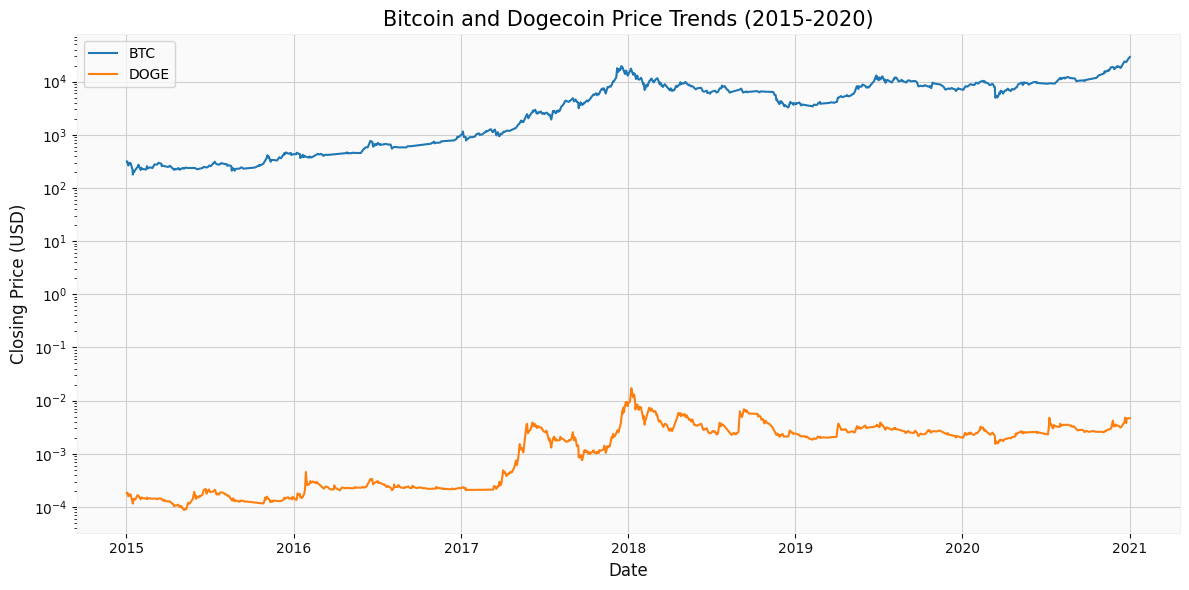

In [40]:
plt.figure(figsize=(12, 6))
for symbol in ['BTC', 'DOGE']:
    data = df[df['Symbol'] == symbol]
    plt.plot(data['Date'], data['Close'], label=symbol)

plt.title('Bitcoin and Dogecoin Price Trends (2015-2020)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

#### 2. Price Volatility

C:\Users\kietd\AppData\Local\Temp\ipykernel_21768\871349456.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby('Symbol').apply(calculate_volatility).reset_index(drop=True)


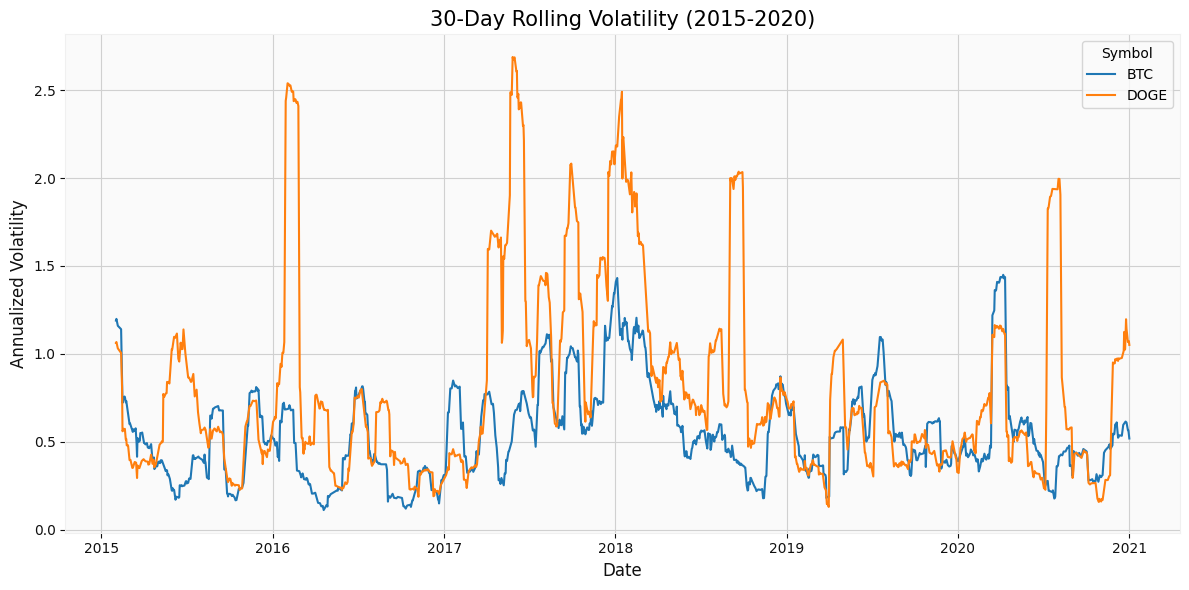

In [41]:
def calculate_volatility(data):
    data['Volatility'] = data['Close'].pct_change().rolling(window=30).std() * np.sqrt(252)
    return data

volatility = df.groupby('Symbol').apply(calculate_volatility).reset_index(drop=True)

plt.figure(figsize=(12, 6))
for symbol in volatility['Symbol'].unique():
    symbol_data = volatility[volatility['Symbol'] == symbol]
    plt.plot(symbol_data['Date'], symbol_data['Volatility'], label=symbol)

plt.title('30-Day Rolling Volatility (2015-2020)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.legend(title='Symbol')
plt.tight_layout()
plt.show()

#### 3. Correlation Heatmap


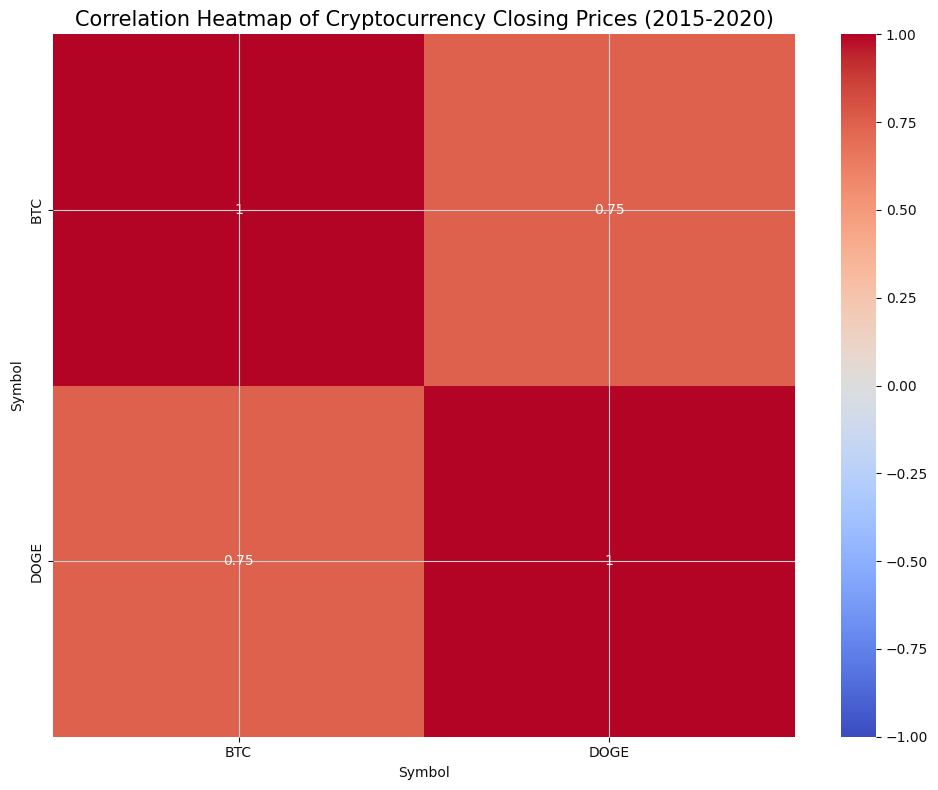

In [42]:
correlation = df.pivot(index='Date', columns='Symbol', values='Close').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Cryptocurrency Closing Prices (2015-2020)', fontsize=15)
plt.tight_layout()
plt.show()

#### 4. Trading Volume Over Time

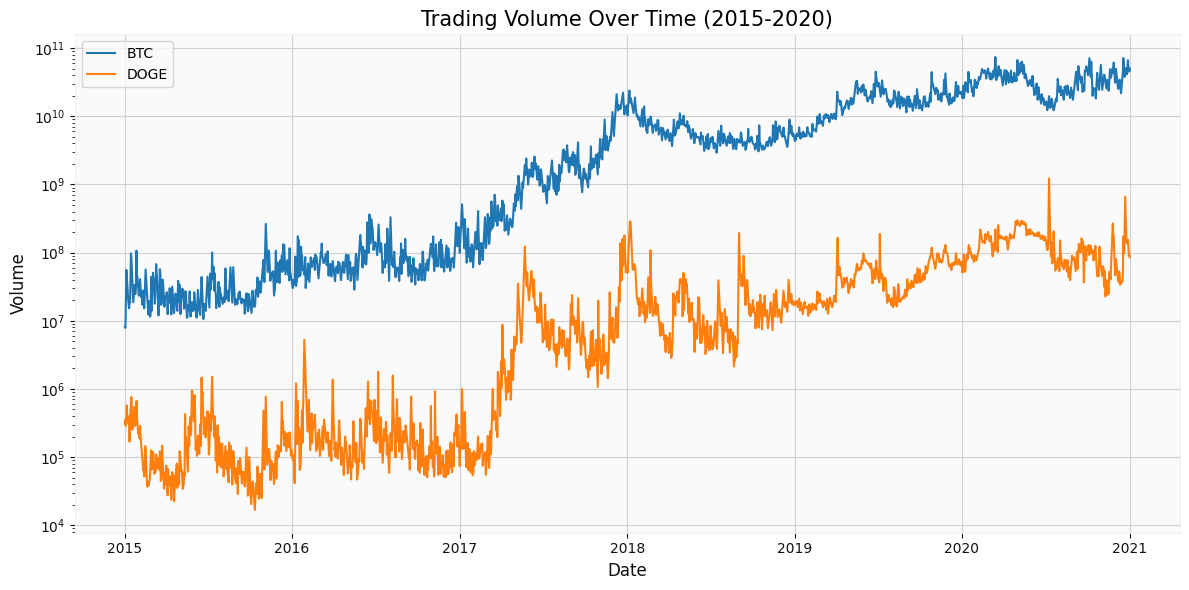

In [43]:
plt.figure(figsize=(12, 6))
for symbol in ['BTC', 'DOGE']:
    data = df[df['Symbol'] == symbol]
    plt.plot(data['Date'], data['Volume'], label=symbol)

plt.title('Trading Volume Over Time (2015-2020)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

### COVID-19 Impact Analysis (2020)

#### 5. Cryptocurrency Price Trends During COVID-19 (2020)

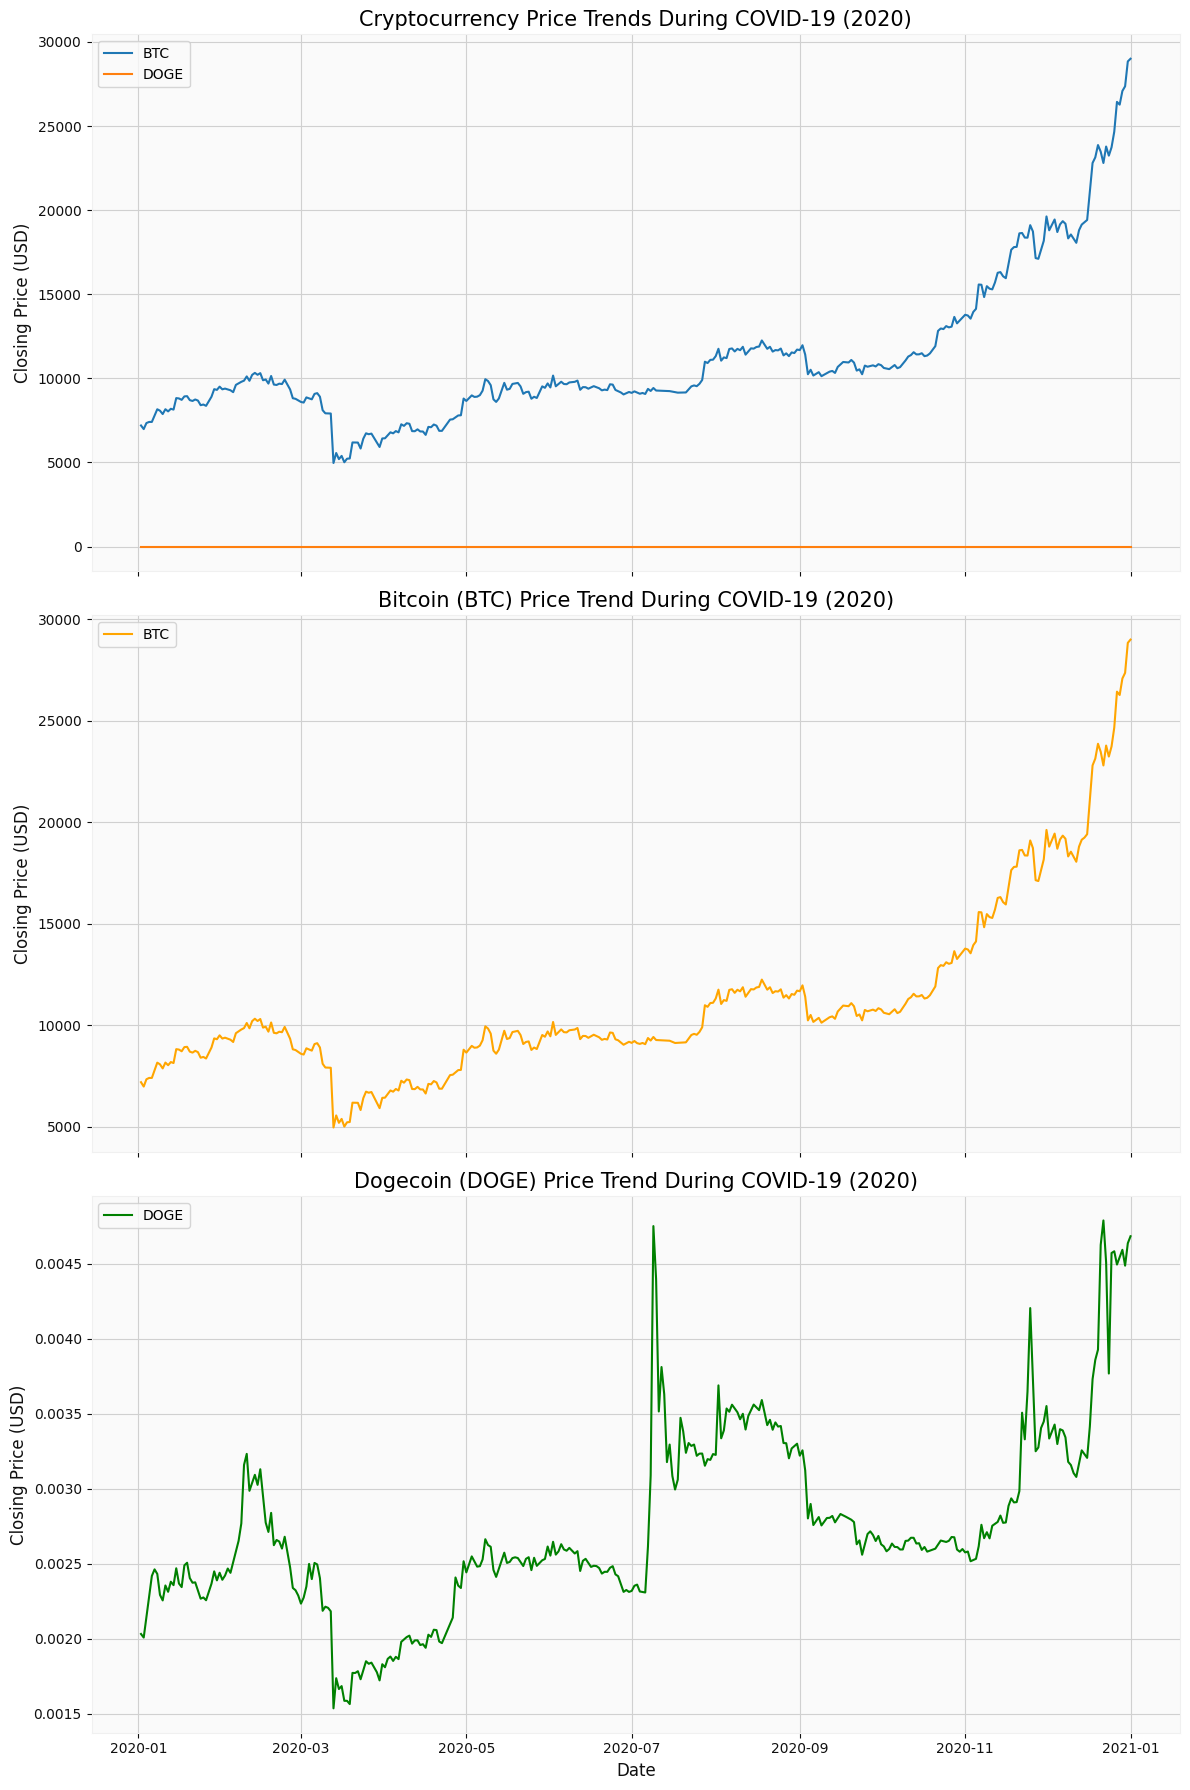

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Combined plot
for symbol in ['BTC', 'DOGE']:
    data = covid_df[covid_df['Symbol'] == symbol]
    ax1.plot(data['Date'], data['Close'], label=symbol)

ax1.set_title('Cryptocurrency Price Trends During COVID-19 (2020)', fontsize=15)
ax1.set_ylabel('Closing Price (USD)', fontsize=12)
ax1.legend()

# BTC plot
btc_data = covid_df[covid_df['Symbol'] == 'BTC']
ax2.plot(btc_data['Date'], btc_data['Close'], label='BTC', color='orange')
ax2.set_title('Bitcoin (BTC) Price Trend During COVID-19 (2020)', fontsize=15)
ax2.set_ylabel('Closing Price (USD)', fontsize=12)
ax2.legend()

# DOGE plot
doge_data = covid_df[covid_df['Symbol'] == 'DOGE']
ax3.plot(doge_data['Date'], doge_data['Close'], label='DOGE', color='green')
ax3.set_title('Dogecoin (DOGE) Price Trend During COVID-19 (2020)', fontsize=15)
ax3.set_xlabel('Date', fontsize=12)
ax3.set_ylabel('Closing Price (USD)', fontsize=12)
ax3.legend()

plt.tight_layout()
plt.show()

#### 6. COVID-19 Impact on Market Cap

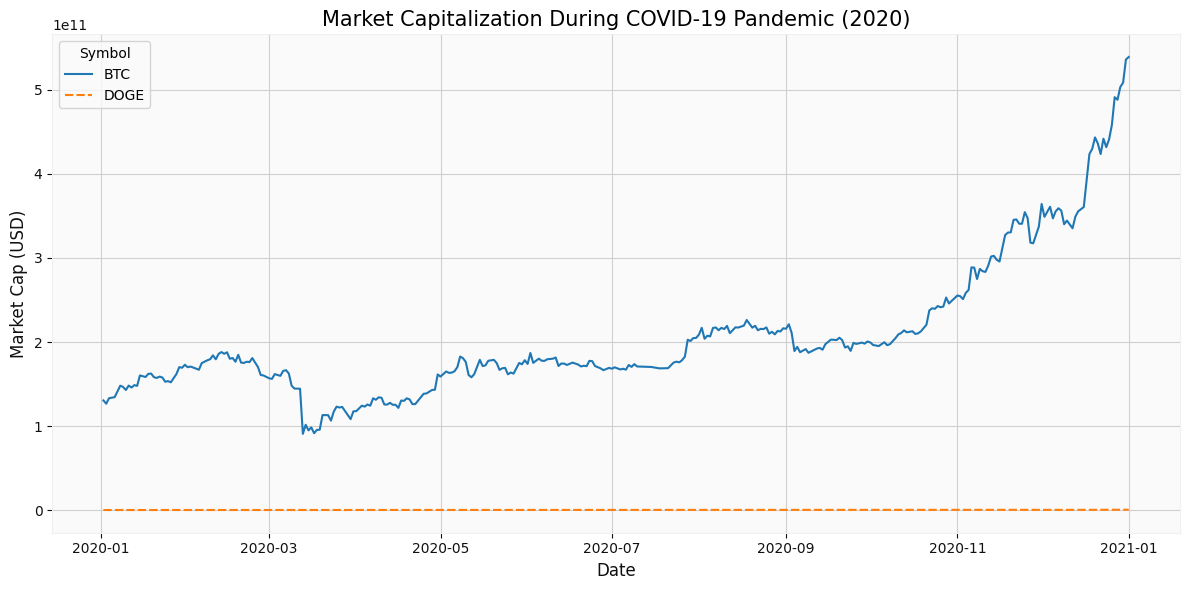

In [45]:
covid_data = covid_df.pivot(index='Date', columns='Symbol', values='Marketcap')
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_data)
plt.title('Market Capitalization During COVID-19 Pandemic (2020)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Cap (USD)', fontsize=12)
plt.legend(title='Symbol')
plt.tight_layout()
plt.show()


#### 7. Price Volatility During COVID-19

C:\Users\kietd\AppData\Local\Temp\ipykernel_21768\449986385.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  covid_volatility = covid_df.groupby('Symbol').apply(calculate_volatility).reset_index(drop=True)


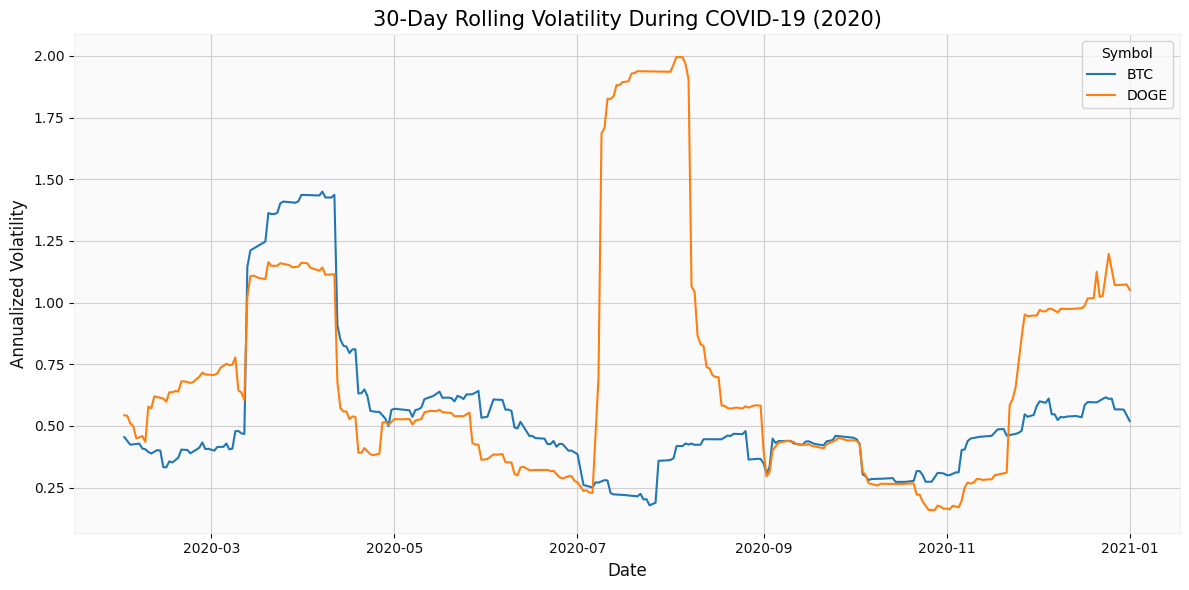

In [46]:
def calculate_volatility(data):
    data['Volatility'] = data['Close'].pct_change().rolling(window=30).std() * np.sqrt(252)
    return data

covid_volatility = covid_df.groupby('Symbol').apply(calculate_volatility).reset_index(drop=True)

plt.figure(figsize=(12, 6))
for symbol in covid_volatility['Symbol'].unique():
    symbol_data = covid_volatility[covid_volatility['Symbol'] == symbol]
    plt.plot(symbol_data['Date'], symbol_data['Volatility'], label=symbol)

plt.title('30-Day Rolling Volatility During COVID-19 (2020)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.legend(title='Symbol')
plt.tight_layout()
plt.show()

#### 8. Volume Comparison During COVID-19

<Figure size 1200x600 with 0 Axes>

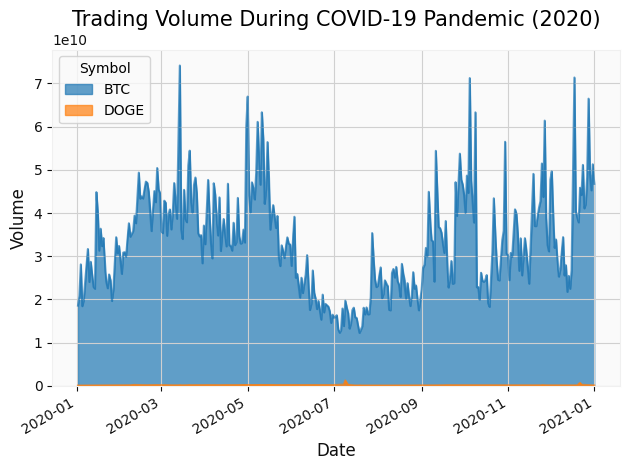

In [47]:
covid_data = covid_df.pivot(index='Date', columns='Symbol', values='Volume')
plt.figure(figsize=(12, 6))
covid_data.plot(kind='area', stacked=False, alpha=0.7)
plt.title('Trading Volume During COVID-19 Pandemic (2020)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(title='Symbol')
plt.tight_layout()
plt.show()


#### 9. Candlestick Chart for Bitcoin during COVID-19

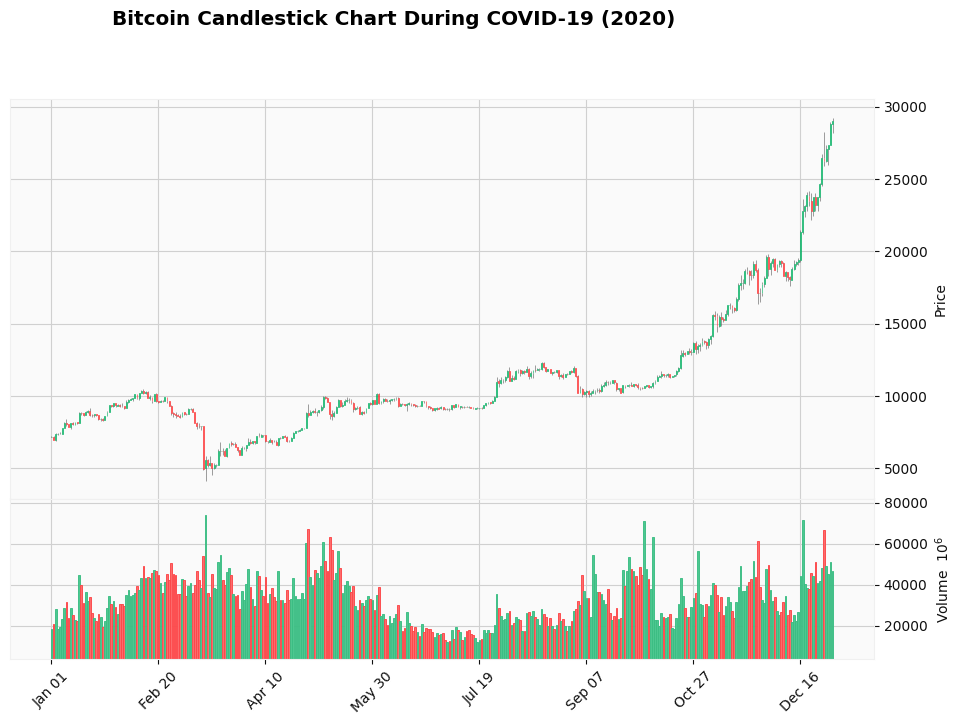

In [48]:
btc_covid = covid_df[covid_df['Symbol'] == 'BTC'].set_index('Date')
mpf.plot(btc_covid, type='candle', style='yahoo', title='Bitcoin Candlestick Chart During COVID-19 (2020)',
         volume=True, figsize=(12, 8))